<a href="https://colab.research.google.com/github/kurek0010/data-science-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).



### <a name='a2'></a> Import bibliotek

In [5]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.17.1


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [8]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [9]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

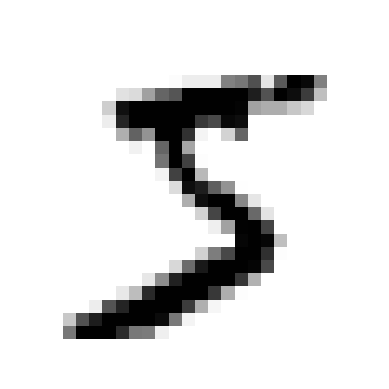

In [10]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

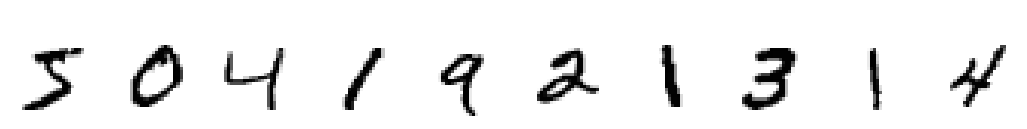

In [15]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> Trenowanie modelu

In [13]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8584 - loss: 0.4923
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9544 - loss: 0.1579
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9668 - loss: 0.1097
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9762 - loss: 0.0766


### <a name='a7'></a> Ocena modelu

In [16]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9776 - loss: 0.0733


[0.07328078895807266, 0.9775999784469604]

In [17]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.912600,0.302213
1,0.957550,0.144312
2,0.966933,0.107428
3,0.973450,0.087845
4,0.976467,0.076518


In [18]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [19]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.000000061678, 0.000000008148, 0.000002016882, ..., 0.9999357     , 0.000000402409, 0.000014145106],
       [0.000000489191, 0.000026817372, 0.99995035    , ..., 0.000000000005, 0.000000109969, 0.            ],
       [0.00000008783 , 0.9995697     , 0.00013580502 , ..., 0.0002244087  , 0.000045026514, 0.000000386454],
       ...,
       [0.000000000008, 0.000000000771, 0.000000000071, ..., 0.000001250007, 0.000000709732, 0.000043763153],
       [0.000000000238, 0.000000000053, 0.000000000046, ..., 0.000000002818, 0.000021916965, 0.00000000007 ],
       [0.000000022029, 0.00000000013 , 0.000000009942, ..., 0.000000000005, 0.000000000193, 0.000000000003]],
      dtype=float32)

poniższa funkcja juz nie działa

In [20]:
y_pred = model.predict_classes(X_test)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [21]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [23]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([151, 241, 247, 259, 321, 340, 445, 479, 543, 582], dtype='int64')

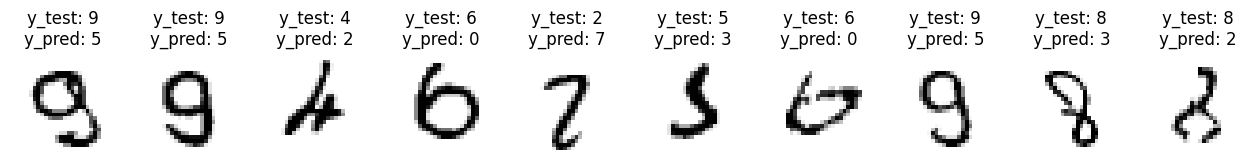

In [28]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()

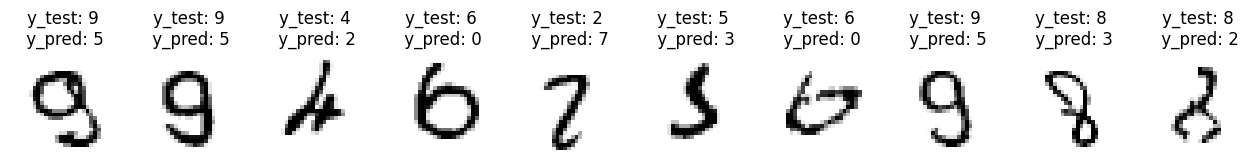

In [29]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\n y_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()